Image Filtering - Part I
- Illustrate image smoothing and blurring
- Apply gaussian filter for image denoising
- Examine image gradient
- Understand the concepts of histograms
- Examine histogram equalization and adaptive histogram equalization

In [ ]:
# Image Filtering with OpenCV - Part I
# Interactive Jupyter Notebook Tutorial

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request
import os
from IPython.display import Markdown, display

# Configure matplotlib for better display in Jupyter
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('ggplot')

# SECTION 0: Introduction and Setup
print("="*80)
print("SECTION 0: INTRODUCTION AND SETUP")
print("="*80)

# Let's start by downloading a sample image if it doesn't exist
sample_image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
sample_image_path = "sample_image.jpg"

if not os.path.exists(sample_image_path):
    print(f"Downloading sample image to {sample_image_path}...")
    urllib.request.urlretrieve(sample_image_url, sample_image_path)
    print("Download complete!")

# Load the image
print("Loading sample image...")
image = cv2.imread(sample_image_path)
# Convert BGR to RGB for display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the original images
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Color Image', fontsize=14)
plt.axis('off')

plt.subplot(122)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# SECTION 1: Image Smoothing and Blurring
print("\n"+"="*80)
print("SECTION 1: IMAGE SMOOTHING AND BLURRING")
print("="*80)

# Create a theoretical explanation using Markdown
display(Markdown("""
## Image Smoothing: Theoretical Foundation

Image smoothing (or blurring) is a fundamental technique in image processing that reduces noise and detail in an image. 

### The Convolution Operation

At the heart of image filtering is the **convolution operation**. Mathematically, convolution between an image $f$ and a kernel $h$ is defined as:

$$(f * h)[m,n] = \sum_{i=-a}^{a} \sum_{j=-b}^{b} h[i,j] \cdot f[m-i,n-j]$$

where:
- $f$ is the input image
- $h$ is the convolution kernel (also called filter)
- $m,n$ are pixel coordinates
- $a,b$ define the kernel size

In simpler terms, we place the kernel over each pixel in the image, multiply the overlapping values, sum them up, and replace the center pixel with this sum.

### Why Smooth Images?

1. **Noise Reduction**: Smoothing helps remove random variations in pixel intensity.
2. **Preprocessing**: Many computer vision algorithms work better on smoothed images.
3. **Detail Reduction**: Sometimes we want to focus on larger structures by reducing details.

Let's explore different smoothing techniques and their effects.
"""))

# First, let's add some noise to our image to better demonstrate smoothing effects
np.random.seed(42)  # For reproducibility
noisy_gray = gray_image.copy()
# Add Gaussian noise
noise = np.random.normal(0, 15, gray_image.shape).astype(np.uint8)
noisy_gray = cv2.add(noisy_gray, noise)

# Show the noisy image
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image', fontsize=14)
plt.axis('off')

plt.subplot(122)
plt.imshow(noisy_gray, cmap='gray')
plt.title('Noisy Grayscale Image', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# 1.1 Averaging Filter (Box Filter)
print("\n1.1 Averaging Filter (Box Filter)")

# Create a box filter explanation
display(Markdown("""
### 1.1 Averaging Filter (Box Filter)

The averaging filter (also known as box filter) is the simplest form of image smoothing. It works by replacing each pixel value with the average value of its surrounding pixels.

**Mathematical Representation:**
- For a 3×3 averaging filter, the kernel is:

$$h = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$$

- Each element in the kernel has equal weight (1/9 for a 3×3 kernel)

Let's apply averaging filters with different kernel sizes to see their effects:
"""))

# Apply averaging filter with different kernel sizes
avg_3x3 = cv2.blur(noisy_gray, (3, 3))
avg_7x7 = cv2.blur(noisy_gray, (7, 7))
avg_15x15 = cv2.blur(noisy_gray, (15, 15))

# Display the results
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.imshow(noisy_gray, cmap='gray')
plt.title('Noisy Image', fontsize=14)
plt.axis('off')

plt.subplot(222)
plt.imshow(avg_3x3, cmap='gray')
plt.title('3×3 Averaging Filter', fontsize=14)
plt.axis('off')

plt.subplot(223)
plt.imshow(avg_7x7, cmap='gray')
plt.title('7×7 Averaging Filter', fontsize=14)
plt.axis('off')

plt.subplot(224)
plt.imshow(avg_15x15, cmap='gray')
plt.title('15×15 Averaging Filter', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Show a region of interest to see the effect more clearly
# Extract a small region (eyes) from the image
x, y = 250, 250
roi_size = 100
roi_noisy = noisy_gray[y:y+roi_size, x:x+roi_size]
roi_avg_3x3 = avg_3x3[y:y+roi_size, x:x+roi_size]
roi_avg_7x7 = avg_7x7[y:y+roi_size, x:x+roi_size]
roi_avg_15x15 = avg_15x15[y:y+roi_size, x:x+roi_size]

plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.imshow(roi_noisy, cmap='gray')
plt.title('ROI: Noisy Image', fontsize=14)
plt.axis('off')

plt.subplot(222)
plt.imshow(roi_avg_3x3, cmap='gray')
plt.title('ROI: 3×3 Averaging Filter', fontsize=14)
plt.axis('off')

plt.subplot(223)
plt.imshow(roi_avg_7x7, cmap='gray')
plt.title('ROI: 7×7 Averaging Filter', fontsize=14)
plt.axis('off')

plt.subplot(224)
plt.imshow(roi_avg_15x15, cmap='gray')
plt.title('ROI: 15×15 Averaging Filter', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Common pitfalls for averaging filter
display(Markdown("""
#### Common Pitfalls with Averaging Filter:

1. **Edge Blurring**: The averaging filter doesn't distinguish between edges and non-edges, so it blurs important edges in the image.
2. **Detail Loss**: As the kernel size increases, more details are lost.
3. **Equal Weighting**: All pixels in the neighborhood have equal weight, which doesn't respect the spatial relationship between pixels.

These limitations led to the development of more sophisticated filters like the Gaussian filter.
"""))

# 1.2 Gaussian Filter
print("\n1.2 Gaussian Filter")

# Create a Gaussian filter explanation
display(Markdown("""
### 1.2 Gaussian Filter

The Gaussian filter is a more sophisticated smoothing filter that uses a Gaussian distribution (bell-shaped curve) to determine the weights of the kernel.

**Mathematical Foundation:**
- The 2D Gaussian function is defined as:

$$G(x,y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}}$$

where:
- $(x,y)$ are the coordinates from the center of the kernel
- $\sigma$ is the standard deviation of the Gaussian distribution

The kernel values are sampled from this distribution, with the center having the highest weight and the weights decreasing as you move away from the center.

**Key Advantage:** The Gaussian filter gives more weight to pixels near the center and less weight to pixels far away, which often preserves edges better than the averaging filter.

Let's apply Gaussian filters with different standard deviations to see their effects:
"""))

# Apply Gaussian filter with different standard deviations
gauss_3x3 = cv2.GaussianBlur(noisy_gray, (3, 3), 0)
gauss_7x7 = cv2.GaussianBlur(noisy_gray, (7, 7), 0)
gauss_15x15 = cv2.GaussianBlur(noisy_gray, (15, 15), 0)

# Display the results
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.imshow(noisy_gray, cmap='gray')
plt.title('Noisy Image', fontsize=14)
plt.axis('off')

plt.subplot(222)
plt.imshow(gauss_3x3, cmap='gray')
plt.title('3×3 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.subplot(223)
plt.imshow(gauss_7x7, cmap='gray')
plt.title('7×7 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.subplot(224)
plt.imshow(gauss_15x15, cmap='gray')
plt.title('15×15 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Show ROI for Gaussian filter
roi_gauss_3x3 = gauss_3x3[y:y+roi_size, x:x+roi_size]
roi_gauss_7x7 = gauss_7x7[y:y+roi_size, x:x+roi_size]
roi_gauss_15x15 = gauss_15x15[y:y+roi_size, x:x+roi_size]

plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.imshow(roi_noisy, cmap='gray')
plt.title('ROI: Noisy Image', fontsize=14)
plt.axis('off')

plt.subplot(222)
plt.imshow(roi_gauss_3x3, cmap='gray')
plt.title('ROI: 3×3 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.subplot(223)
plt.imshow(roi_gauss_7x7, cmap='gray')
plt.title('ROI: 7×7 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.subplot(224)
plt.imshow(roi_gauss_15x15, cmap='gray')
plt.title('ROI: 15×15 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Compare Gaussian and Average filters
display(Markdown("""
#### Comparison: Gaussian vs. Averaging Filter

Let's compare the Gaussian and averaging filters of the same size to see the difference:
"""))

# Compare 7x7 filters
plt.figure(figsize=(14, 6))

plt.subplot(131)
plt.imshow(noisy_gray, cmap='gray')
plt.title('Noisy Image', fontsize=14)
plt.axis('off')

plt.subplot(132)
plt.imshow(avg_7x7, cmap='gray')
plt.title('7×7 Averaging Filter', fontsize=14)
plt.axis('off')

plt.subplot(133)
plt.imshow(gauss_7x7, cmap='gray')
plt.title('7×7 Gaussian Filter', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Visualize a Gaussian kernel
display(Markdown("""
#### Visualizing a Gaussian Kernel

To better understand how the Gaussian filter works, let's visualize what a Gaussian kernel looks like:
"""))

# Create a Gaussian kernel
def create_gaussian_kernel(size=7, sigma=1.0):
    """Create a 2D Gaussian kernel."""
    k = (size - 1) // 2
    x, y = np.meshgrid(np.arange(-k, k + 1), np.arange(-k, k + 1))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / kernel.sum()

# Visualize the kernel
gaussian_kernel = create_gaussian_kernel(7, 1.0)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(gaussian_kernel, cmap='viridis')
plt.title('Gaussian Kernel (2D)', fontsize=14)
plt.colorbar()

plt.subplot(122)
x = np.arange(0, 7, 1)
y = np.arange(0, 7, 1)
X, Y = np.meshgrid(x, y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, gaussian_kernel, cmap='viridis')
ax.set_title('Gaussian Kernel (3D)', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Weight')

plt.tight_layout()
plt.show()



# Common pitfalls for Gaussian filter
display(Markdown("""
#### Common Pitfalls with Gaussian Filter:

1. **Choosing the Right Sigma**: Using too small a sigma won't remove enough noise, while too large a sigma will blur important details.
2. **Computational Cost**: Larger kernels require more computation time.
3. **Border Handling**: Gaussian blur near the edges of the image can produce artifacts due to padding.
4. **Multiple Passes**: Sometimes applying a small Gaussian filter multiple times can produce better results than a single pass with a large kernel.
"""))

# 1.3 Median Filter
print("\n1.3 Median Filter")

# Create a median filter explanation
display(Markdown("""
### 1.3 Median Filter

Unlike the averaging and Gaussian filters, the median filter is a non-linear filter that works by replacing each pixel value with the median value of its neighboring pixels.

**Mathematical Foundation:**
- For each pixel, the values in its neighborhood are sorted
- The middle value (median) replaces the central pixel

**Key Advantage:** The median filter is particularly effective at removing 'salt and pepper' noise while preserving edges better than linear filters.

Let's create an image with 'salt and pepper' noise to demonstrate

Template matching:

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html


In [6]:
! pwd

/Users/aasibipin/cosc-32001-computer-vision/week 3


In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('waldo_in_image.png', cv.IMREAD_GRAYSCALE)


[ WARN:0@51.800] global grfmt_png.cpp:695 read_chunk chunk data is too large


In [10]:
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

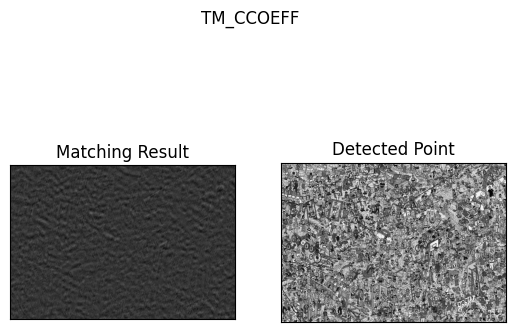

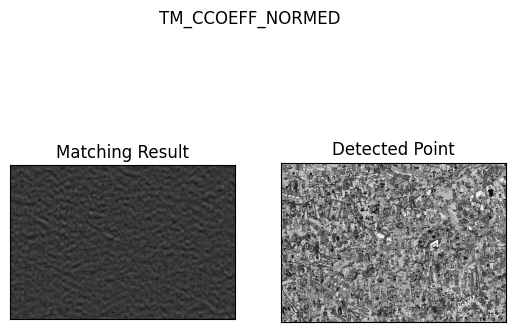

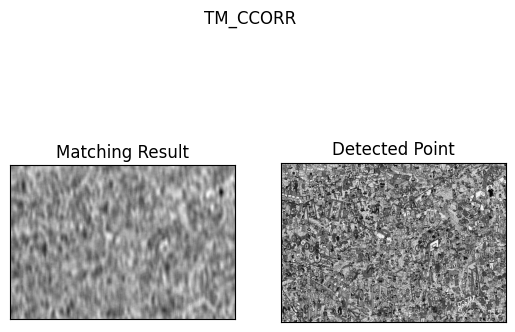

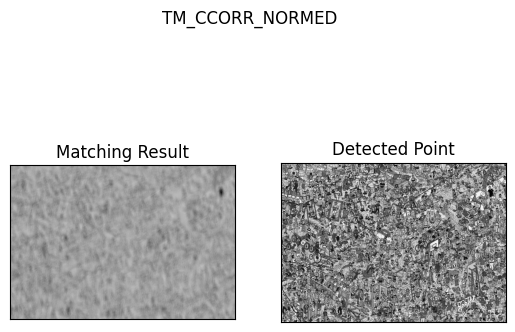

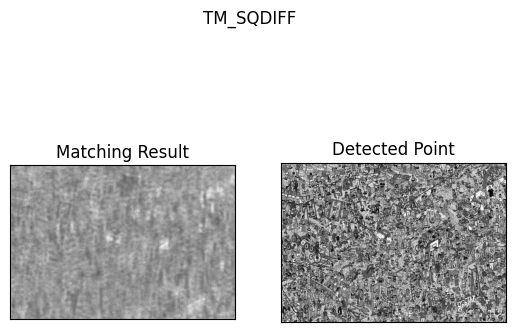

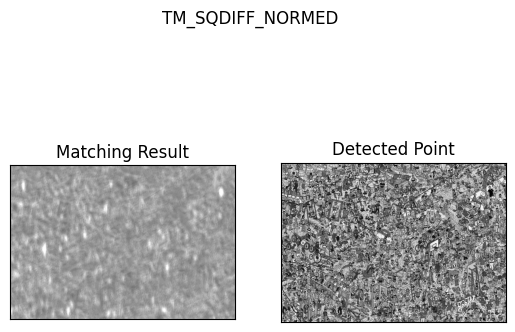

In [11]:


# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)

    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv.imread('mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv.imwrite('res.png',img_rgb)

[ WARN:0@118.895] global loadsave.cpp:268 findDecoder imread_('mario.png'): can't open/read file: check file path/integrity


AssertionError: file could not be read, check with os.path.exists()

kmeans clustering:

https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html


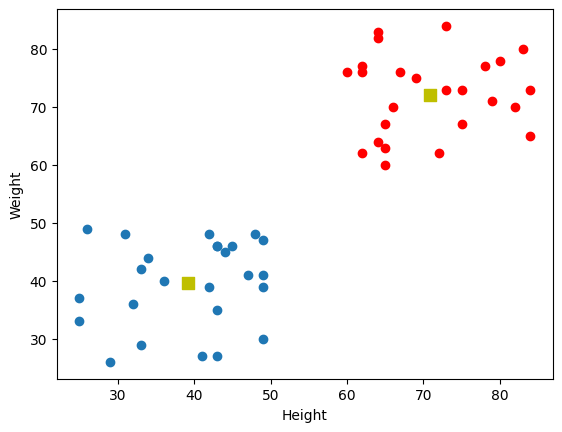

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('apple-orange.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB for proper visualization

# Reshape image into 2D array (each pixel as a feature vector)
Z = img.reshape((-1, 3))
Z = np.float32(Z)  # Convert to float32 for k-means

# Define criteria and apply k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)


In [20]:
K = 3 # Number of clusters
_, label, center = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# based on distance in color space

K-Means is an **unsupervised machine learning algorithm** that groups similar data points into `K` clusters based on distance. In the context of images, it is used for **color quantization and segmentation** by grouping pixels with similar colors.

## **How Does It Work?**
1. Each pixel is represented as a **3D vector** in the RGB color space: `(R, G, B)`.
2. Randomly select `K` initial cluster centers (centroids).
3. **Assign pixels to the closest centroid** using **Euclidean distance**:
   \[
   d = \sqrt{(R_1 - R_2)^2 + (G_1 - G_2)^2 + (B_1 - B_2)^2}
   \]
4. Update centroids as the mean of all assigned pixels.
5. Repeat steps **3-4** until the clusters converge.

#### **Why Use K-Means for Images?**
✅ **Color Quantization** – Reduces the number of colors in an image, useful for compression and artistic effects.  
✅ **Image Segmentation** – Groups similar colors, making it easier to detect objects or regions in images.  
✅ **Computationally Efficient** – Works well for large images compared to complex segmentation methods.  

#### **Common Mistakes & How to Avoid Them**
🚨 **Choosing an inappropriate `K` value** – Too low can merge different colors, too high may over-segment.  
🚨 **Not normalizing pixel values** – Ensure pixel values are `float32` before applying k-means.  
🚨 **Ignoring different color spaces** – RGB is common, but **HSV, LAB, or YCrCb** may provide better clustering for certain tasks.

#### **Further Learning: Try These Experiments!**
- Change the **number of clusters `K`** and observe the effect on image segmentation.
- Convert the image to **HSV or LAB color space** before applying k-means.
- Apply k-means to **grayscale images**—what happens?

By understanding how k-means clusters pixels, you gain insight into how computers **perceive and group colors** in images! 🎨🔍

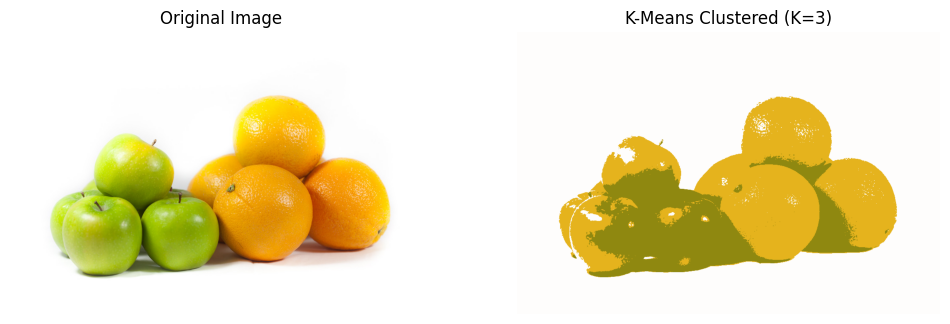

In [21]:
# Convert centers back to uint8 and recreate clustered image
center = np.uint8(center)
res = center[label.flatten()]
clustered_img = res.reshape((img.shape))

# Plot original and clustered images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(clustered_img)
axes[1].set_title(f"K-Means Clustered (K={K})")
axes[1].axis("off")

plt.show()

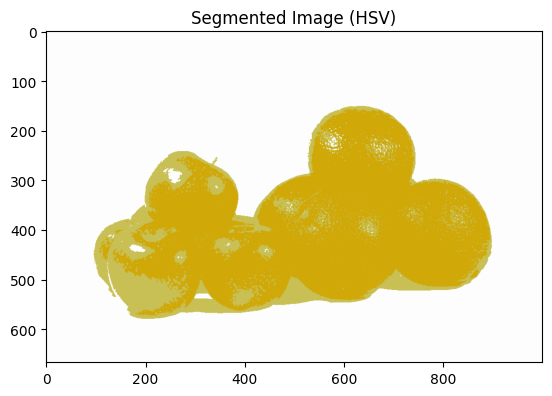

In [22]:
# K-Means can also be applied in different color spaces such as **HSV (Hue, Saturation, Value)** or **LAB (Lightness, A/B color channels)**.

#### **Implementation for HSV**
hsv_image = cv.cvtColor(img, cv.COLOR_RGB2HSV)
pixel_values = hsv_image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Apply k-means clustering
_, labels, centers = cv.kmeans(pixel_values, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert back to original image format
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(hsv_image.shape)

# Convert back to RGB for display
segmented_image = cv.cvtColor(segmented_image, cv.COLOR_HSV2RGB)
plt.imshow(segmented_image)
plt.title('Segmented Image (HSV)')
plt.show()






agumentations/geometrics transformations:
https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html

In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

In [2]:
def plot_side_by_side(img1, img2, title1, title2, cmap = None):
    fig = plt.figure(tight_layout='auto', figsize=(10, 7))
    fig.add_subplot(221)
    plt.title(title1)
    plt.imshow(img)

    fig.add_subplot(222)
    plt.title(title2)
    plt.imshow(img2, cmap = None)
    return fig

In [3]:
# load Image
# dividing by 255 to scale intensity values between 0,1
img = imread('butterfly.jpg') / 255

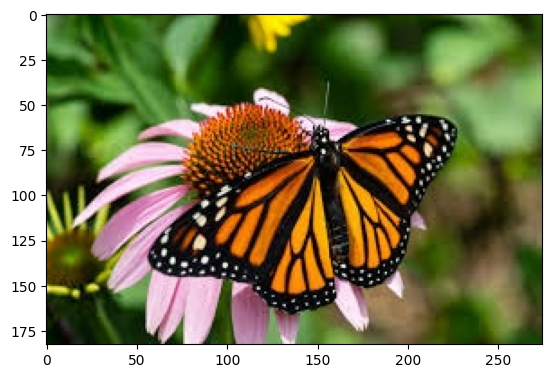

In [4]:
# plot original Image
plt.imshow(img)
plt.show()

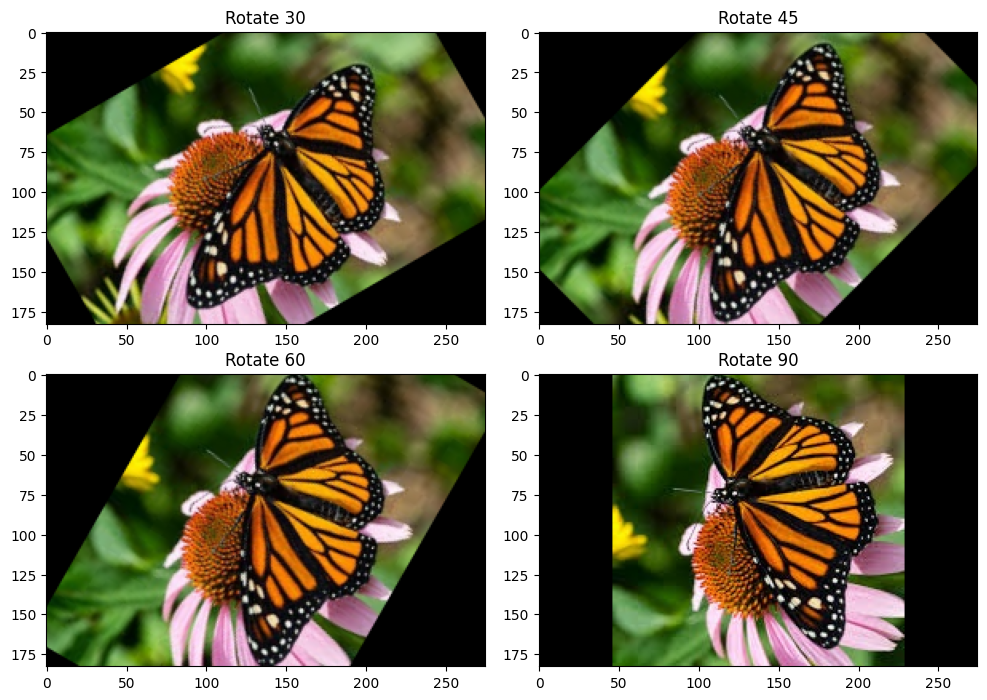

In [5]:
# image rotation using skimage.transformation.rotate
rotate30 = rotate(img, angle=30)
rotate45 = rotate(img, angle=45)
rotate60 = rotate(img, angle=60)
rotate90 = rotate(img, angle=90)

fig = plt.figure(tight_layout='auto', figsize=(10, 7))

fig.add_subplot(221)
plt.title('Rotate 30')
plt.imshow(rotate30)

fig.add_subplot(222)
plt.title('Rotate 45')
plt.imshow(rotate45)

fig.add_subplot(223)
plt.title('Rotate 60')
plt.imshow(rotate60)

fig.add_subplot(224)
plt.title('Rotate 90')
plt.imshow(rotate90)

plt.show()

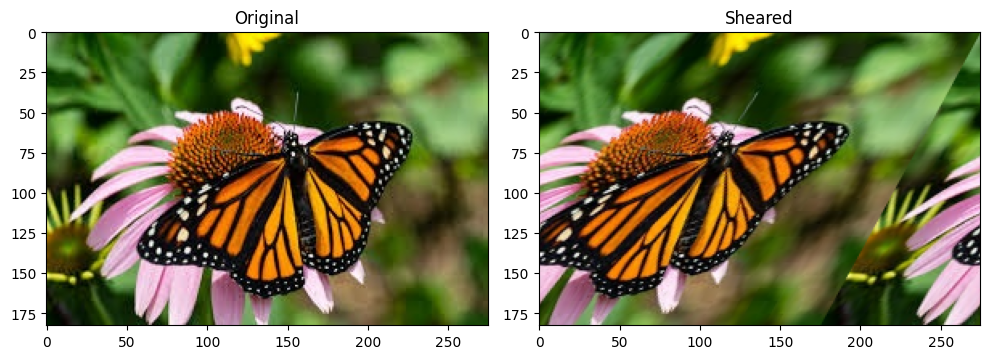

In [6]:
# image shearing using sklearn.transform.AffineTransform
# try out with differnt values of shear 
tf = AffineTransform(shear=-0.5)
sheared = transform.warp(img, tf, order=1, preserve_range=True, mode='wrap')

sheared_fig = plot_side_by_side(img, sheared, 'Original', 'Sheared')

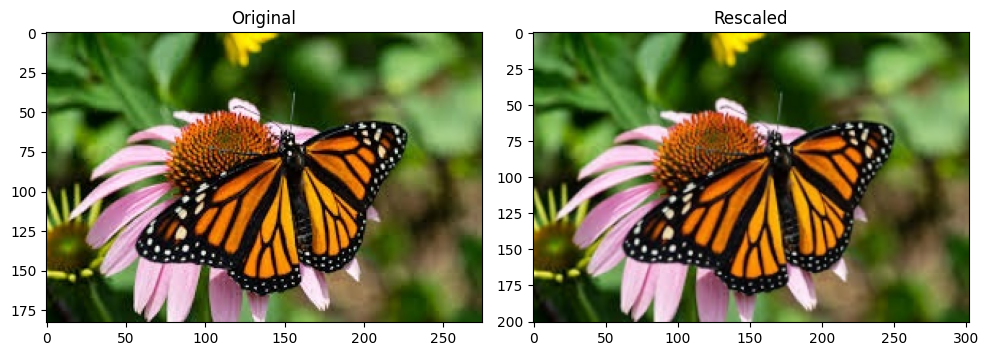

In [7]:
# Image rescaling with sklearn.transform.rescale
rescaled = transform.rescale(img, 1.1)

rescaled_fig = plot_side_by_side(img, rescaled, 'Original', 'Rescaled')
plt.show()

In [8]:
print('Original Shape: ',img.shape)
print('Rescaled Shape: ',rescaled.shape)

Original Shape:  (183, 275, 3)
Rescaled Shape:  (201, 302, 3)


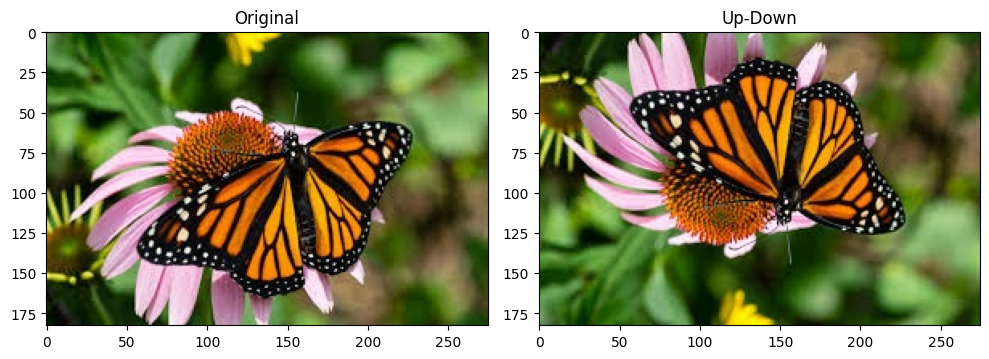

In [9]:
# flip up-down using np.flipud
up_down = np.flipud(img)

fig_updown = plot_side_by_side(img, up_down, 'Original', 'Up-Down')
plt.show()

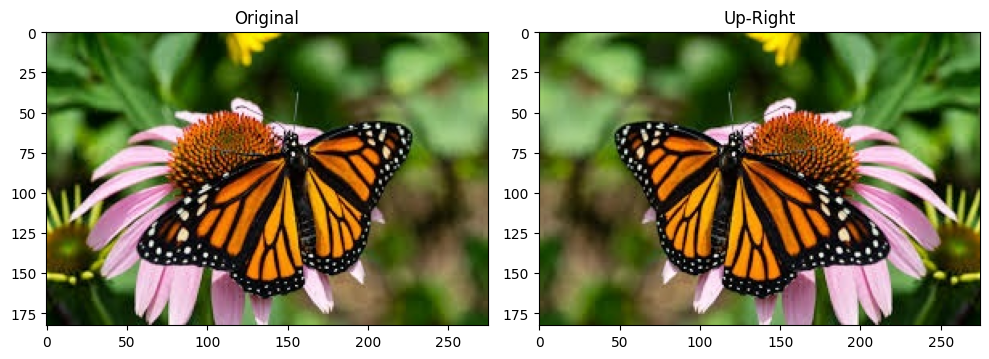

In [10]:
# flip up-down using np.flipud
left_right = np.fliplr(img)

fig_lr = plot_side_by_side(img, left_right, 'Original', 'Up-Right')
plt.show()

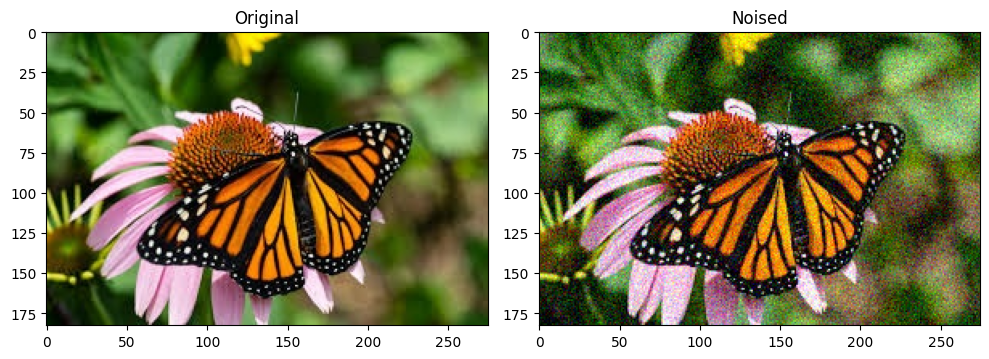

In [11]:
# Apply Random Noise to image using skimage.utils.random_noise
noised = random_noise(img, var=0.1**2)

fig_noised = plot_side_by_side(img, noised, 'Original', 'Noised')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.39215686274509803..1.392156862745098].


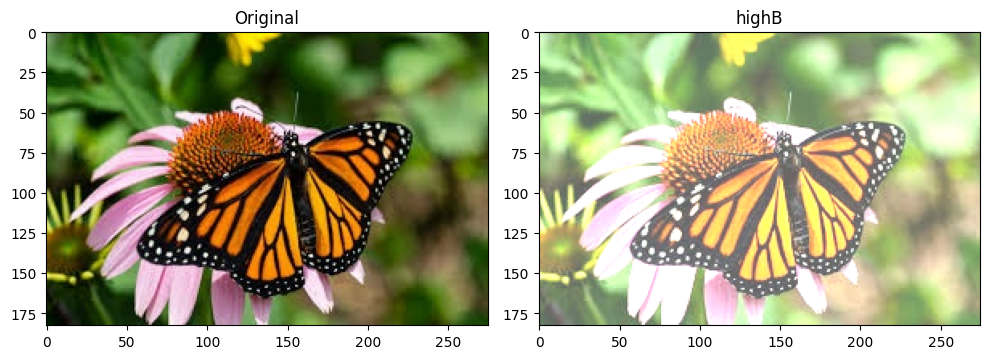

In [12]:
# Increasing the brighness of the Image
# Note: Here we add 100/255 since we scaled Intensity values of Image when loading (by dividing it 255)
highB = img + (100/255)

fig_highB = plot_side_by_side(img, highB, 'Original', 'highB')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.5].


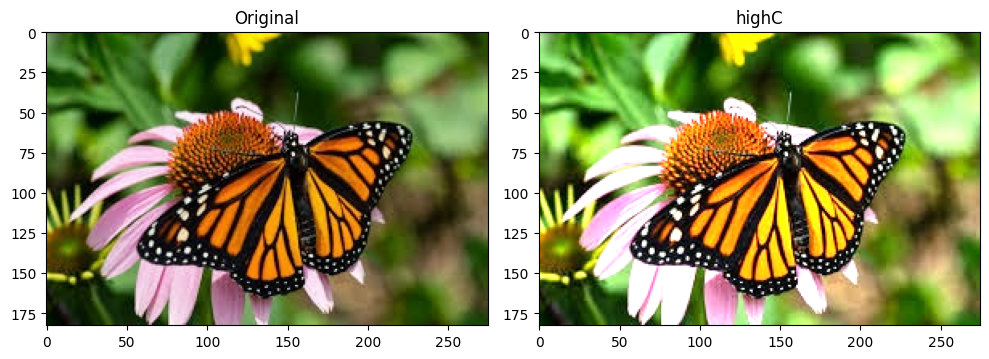

In [13]:
# Increasing the contrast of the Image
# Note: Here we add 100/255 since we scaled Intensity values of Image when loading (by dividing it 255)
highC = img * 1.5

fig_highB = plot_side_by_side(img, highC, 'Original', 'highC')
plt.show()